Resources: https://github.com/facebookresearch/odin &
https://github.com/mattgroh/fitzpatrick17k



In [ ]:
!pip install numpy tensorflow keras opencv-python-headless scikit-learn tqdm

In [ ]:
#!pip install numpy tensorflow==2.8.0 keras opencv-python-headless scikit-learn


In [ ]:
import tensorflow as tf

print(tf.__version__)

2.13.0


Dealing with compability problem :

In [ ]:
import os
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.compat.v1.disable_eager_execution()
sess = tf.Session(config=tf.ConfigProto( log_device_placement=False))

Instructions for updating:
non-resource variables are not supported in the long term


## Fitz dataset

### DenseNET implementation

In [ ]:
import tensorflow as tf
import tensorflow

from tensorflow import keras
from keras.layers import Dense

**Loading the pretrained DenseNet model :**

In [ ]:
print ('Loading Network...')
model_path = '/content/Models/my_model_densenet.h5'
densenet_model  = tf.keras.models.load_model(model_path)
print(' Done.')

Loading Network...


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Colocations handled automatically by placer.


 Done.


## Data generators using ImageDataGenerator from keras

**Preparing fitz dataset**

# Image generator 

In [ ]:
!pip install argparse

In [ ]:
from argument_parser import myParser
args = myParser()

Training using the following parameters:
augment: True
batch_size: 40
checkpoint_frequency: 1000
dataset_root: /usr/xtmp/hannah/segkeras/nn-isic2019/dataset/
decay_start_iteration: 15000
detailed_logs: False
early_stop_patience: 8
experiment_root: FL_Aug_MEL
gpu_device: 0
heavy_augment: False
init_epoch: 0
initial_checkpoint: None
is_train: 1
learning_rate: 1e-06
load_weights: None
loading_threads: 8
loss_type: 1
margin: soft
num_classes: 7
num_epochs: 25
num_gpus: 1
resume: False
sizeH: 224
sizeW: 224
skip_class: MEL
train_iterations: 25000


In [ ]:
#Fitz Darker only
from data_generators import fitzpatrick17kImageDataset
## Loading Data Generators
ROOT = '/content/Datasets/dataset/fitzpatrick 17k /'

print('Loading Data Generators...')
#args.is_train =  # Training Set
args.num_classes = 3
args.sizeW = 224
args.sizeH = 224
args.dataset_root = ROOT
args.is_train = 2 # Validation Set
Testing_generator_darker_only = fitzpatrick17kImageDataset(args)
# args.is_train = 1 # Validation Set
# train_generator = ISICImageDataset(args)
print('   Done.')


Loading Data Generators...
Loading Testing Dataset...
   Done.


In [ ]:
#Fitz Lighter only
from data_generators import fitzpatrick17kImageDataset
## Loading Data Generators
ROOT = '/content/Datasets/dataset/fitzpatrick 17k /'

print('Loading Data Generators...')
#args.is_train =  # Training Set
args.num_classes = 3
args.sizeW = 224
args.sizeH = 224
args.dataset_root = ROOT
args.is_train = 2 # Validation Set  change the condition on common.py before running
Testing_generator_lighter_only = fitzpatrick17kImageDataset(args)
# args.is_train = 1 # Validation Set
# train_generator = ISICImageDataset(args)
print('   Done.')

#/content/drive/MyDrive/Assala Master Project/Datasets/dataset/fitzpatrick 17k /Darker_Only

Loading Data Generators...
Loading Testing Dataset...
   Done.


In [ ]:
#Fitz ALL images
from data_generators import fitzpatrick17kImageDataset
## Loading Data Generators
ROOT = '/content/Datasets/dataset/fitzpatrick 17k /'

print('Loading Data Generators...')
#args.is_train =  # Training Set
args.num_classes = 3
args.sizeW = 224
args.sizeH = 224
args.dataset_root = ROOT
args.is_train = 0 # Validation Set
Testing_generator_ALL = fitzpatrick17kImageDataset(args)
# args.is_train = 1 # Validation Set
# train_generator = ISICImageDataset(args)
print('   Done.')

#/content/drive/MyDrive/Assala Master Project/Datasets/dataset/fitzpatrick 17k /Darker_Only

Loading Data Generators...
Loading Validation Dataset...
   Done.


In [ ]:
#ISIC
from data_generators import ISICImageDataset
## Loading Data Generators
ROOT = '/content/Datasets/ISIC2019/ISIC_2019_Training_Input/'

print('Loading Data Generators...')
args.is_train = 2 # Training Set
args.num_classes = 6
args.sizeW = 224
args.sizeH = 224
args.dataset_root = ROOT
args.is_train = 2 # Validation Set
Validation_generator = ISICImageDataset(args)
# args.is_train = 1 # Validation Set
# train_generator = ISICImageDataset(args)
print('   Done.')

Loading Data Generators...
class_names:['MEL', 'NV', 'BCC', 'AK', 'BKL', 'SCC']
skip_class:['DF', 'VASC']
Loading Testing Dataset...
   Done.


## Find the best optimal parameter for ODIN


In [ ]:
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def Compute_baseline_softmax_scores(model, generator_in, generator_out):
    """
    Calculate the base confidence of the output, no perturbation added here, no temperature scaling used.
    Directly copy the original prediction results.
    """
    print('Begin to compute baseline softmax scores')
    distributions = ['In', 'Out']

    for dist in distributions:
        if dist == 'In':
            generator = generator_in
        elif dist == 'Out':
            generator = generator_out

        with open("/content/ODIN_denseNet_{}.txt".format(dist), 'w') as f:
            # Access file paths from the generator
            file_paths = generator.filepaths
            for i in range(len(file_paths)):
                thisImg = Image.open(file_paths[i]).convert("RGB")
                thisImg = np.expand_dims(np.asarray(thisImg.resize((224,224)))/255, axis=0)
                softmax_probs = model.predict(thisImg)
                softmax_score = np.max(softmax_probs)
                f.write("{}\n".format(softmax_score))
        f.close()

In [ ]:
def compute_baseline_softmax_scores(model, generator_in, generator_out):
    """
    Calculate the base confidence of the output, no perturbation added here, no temperature scaling used.
    Directly copy the original prediction results.
    """
    print('Begin to compute baseline softmax scores')
    distributions = ['In', 'Out']


    for dist in distributions:
        if dist == 'In':
            generator = generator_in
        elif dist == 'Out':
            generator = generator_out

        with open("./densenet121_Base_{}.txt".format(dist), 'w') as f:
            for i in range(len(generator.fids)):
                # print('thisFid: '+str(generator.fids[i]))
                thisImg = Image.open(generator.fids[i]+'.jpg').convert("RGB")
                thisImg = np.expand_dims(np.asarray(thisImg.resize((224,224)))/255, axis =0)
                softmax_probs = model.predict(thisImg)
                softmax_score = np.max(softmax_probs)
                f.write("{}\n".format(softmax_score))
        f.close()

the perturbation function 

In [ ]:
from tqdm import trange

def get_perturbation_helper_func(model, temperature, num_classes):
    """ Return Keras functions for calculating perturbations. """
    # Compute loss based on the second last layer's output and temperature scaling
    dense_pred_layer_output = model.get_layer('dense_4').output
    scaled_dense_pred_output = dense_pred_layer_output / temperature

    print(dense_pred_layer_output)
    print(scaled_dense_pred_output)

    print(K.argmax(model.outputs))

    label_tensor = K.one_hot(K.argmax(model.outputs), 1)
    tf.print(label_tensor)
    loss = K.sparse_categorical_crossentropy(label_tensor, scaled_dense_pred_output, from_logits=True)
    grad_loss = K.gradients(loss, model.inputs)

    # The learning phase flag is a bool tensor (0 = test, 1 = train)
    compute_perturbations = K.function(model.inputs + [K.learning_phase()], grad_loss)

    # https://keras.io/getting-started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer
    get_scaled_dense_pred_output = K.function(model.inputs + [K.learning_phase()], [scaled_dense_pred_output])

    return compute_perturbations, get_scaled_dense_pred_output

### Find the best parameters :

In [ ]:
import os
import numpy as np
import keras.backend as K
import cv2
from PIL import Image
from odin import norm_perturbations
from scipy.special import softmax

def compute_odin_softmax_scores(model, generator_in, generator_out, num_classes = 6, batch_size = 1):
    distributions = ['In', 'Out']

    # This file is used for recording what parameter combinations were already computed.
    progress_file = os.path.join('Done.txt')
    done_set = set()
    if os.path.exists(progress_file):
        with open(progress_file, 'r') as f:
            done_set = set(line.rstrip('\n') for line in f)

    # ODIN parameters

    model_name = 'DenseNet201'
    #Grid Search
    temperatures = [1000, 500, 200, 100, 50, 20, 10, 5, 2, 1]
    
    magnitudes = np.round(np.arange(0, 0.0041, 0.0002), 4)

    need_norm_perturbations = 1



#     model_param_map = get_transfer_model_param_map()
    image_data_format = K.image_data_format()
    learning_phase = 0 # 0 = test, 1 = train



    for temperature in temperatures:
        compute_perturbations, get_scaled_dense_pred_output = get_perturbation_helper_func(model, temperature, num_classes)

        for magnitude in magnitudes:
            for dist in distributions:
                # Skip if the parameter combination has done
                param_comb_id = "{}, {}, {}".format( dist, temperature, magnitude)
                if param_comb_id in done_set:
                    print('Skip ', param_comb_id)
                    continue

                if dist == 'In':
                    generator = generator_in
                elif dist == 'Out':
                    generator = generator_out

                print("\n===== Temperature: {}, Magnitude: {}, {}-Distribution =====".format(temperature, magnitude, dist))

                try:
                    f = open("./densenet121_ODIN_{}_{}_{}.txt".format(temperature, magnitude,dist), 'w')
                    for i in trange(len(generator.fids)):
                        thisFid = generator.fids[i]
                        images = np.expand_dims(cv2.resize(np.array(Image.open(thisFid+'.jpg').convert("RGB"))/255, (224,224), interpolation=cv2.INTER_LINEAR), axis = 0)

                        perturbations = compute_perturbations([images, learning_phase])[0]
                    # Get sign of perturbations
                        perturbations = np.sign(perturbations)

                    # Normalize the perturbations to the same space of image
                    # https://github.com/facebookresearch/odin/issues/5
                    # Perturbations divided by ISIC Training Set STD
                        if need_norm_perturbations:
                            perturbations = norm_perturbations(perturbations, image_data_format)

                    # Add perturbations to images
                        perturbative_images = images - magnitude * perturbations

                    # Calculate the confidence after adding perturbations
                        dense_pred_outputs = get_scaled_dense_pred_output([perturbative_images, learning_phase])[0]
                        softmax_probs = softmax(dense_pred_outputs)
                        softmax_scores = np.max(softmax_probs, axis=-1)

                        for s in softmax_scores:
                            f.write("{}\n".format(s))
                    f.close()

                    with open(progress_file, 'a') as f_done:
                        f_done.write("{}\n".format(param_comb_id))

                except FileNotFoundError:
                    # Handle the "File not found" error
                    print(f"File not found for {param_comb_id}. Skipping...")
                    continue
                last_processed_combination = param_comb_id



In [ ]:
import os
import numpy as np
import keras.backend as K
import cv2
from PIL import Image
from odin import norm_perturbations
from scipy.special import softmax

def compute_odin_softmax_scores(model, generator_in, generator_out, num_classes=6, batch_size=1):
    distributions = ['In', 'Out']

    # This file is used for recording what parameter combinations were already computed.
    progress_file = os.path.join('Done.txt')
    done_set = set()
    if os.path.exists(progress_file):
        with open(progress_file, 'r') as f:
            done_set = set(line.rstrip('\n') for line in f)

    # ODIN parameters
    model_name = 'DenseNet201'
    #temperatures = [1000, 500, 200, 100, 50, 20, 10, 5, 2, 1]
    #temperatures 200

    #magnitudes = np.round(np.arange(0.0002, 0.0041, 0.0002), 4)
    #magnitudes = np.round([0.0002, 0.0041], 4)
    need_norm_perturbations = 1
    image_data_format = K.image_data_format()
    learning_phase = 0  # 0 = test, 1 = train

    for temperature in temperatures:
        compute_perturbations, get_scaled_dense_pred_output = get_perturbation_helper_func(model, temperature, num_classes)

        for magnitude in magnitudes:
            for dist in distributions:
                # Skip if the parameter combination has done
                param_comb_id = "{}, {}, {}".format(dist, temperature, magnitude)
                if param_comb_id in done_set:
                    print('Skip ', param_comb_id)
                    continue

                if dist == 'In':
                    generator = generator_in
                elif dist == 'Out':
                    generator = generator_out

                print("\n===== Temperature: {}, Magnitude: {}, {}-Distribution =====".format(temperature, magnitude, dist))

                # Check if the output file already exists, and if it does, skip processing
                output_file_path = "./densenet121_ODIN_{}_{}_{}.txt".format(temperature, magnitude, dist)
                if os.path.exists(output_file_path):
                    print(f"Output file {output_file_path} already exists. Skipping...")
                    continue

                try:
                    f = open(output_file_path, 'w')
                    for i in trange(len(generator.fids)):
                        thisFid = generator.fids[i]
                        images = np.expand_dims(cv2.resize(np.array(Image.open(thisFid + '.jpg').convert("RGB")) / 255,
                                                           (224, 224), interpolation=cv2.INTER_LINEAR), axis=0)

                        perturbations = compute_perturbations([images, learning_phase])[0]
                        perturbations = np.sign(perturbations)

                        if need_norm_perturbations:
                            perturbations = norm_perturbations(perturbations, image_data_format)

                        perturbative_images = images - magnitude * perturbations

                        dense_pred_outputs = get_scaled_dense_pred_output([perturbative_images, learning_phase])[0]
                        softmax_probs = softmax(dense_pred_outputs)
                        softmax_scores = np.max(softmax_probs, axis=-1)

                        for s in softmax_scores:
                            f.write("{}\n".format(s))
                    f.close()

                    with open(progress_file, 'a') as f_done:
                        f_done.write("{}\n".format(param_comb_id))

                except Exception as e:
                    # Handle any exceptions that might occur during file processing
                    print(f"An error occurred for {param_comb_id}: {str(e)}")
                    continue

                last_processed_combination = param_comb_id


In [ ]:
compute_odin_softmax_scores(densenet_model, Validation_generator, Testing_generator_darker_only)

In [ ]:
compute_odin_softmax_scores(densenet_model, Validation_generator, Testing_generator_lighter_only)

Tensor("dense_4/BiasAdd:0", shape=(?, 6), dtype=float32)
Tensor("truediv:0", shape=(?, 6), dtype=float32)
Tensor("ArgMax:0", shape=(1, ?), dtype=int64)

===== Temperature: 200, Magnitude: 0.0002, In-Distribution =====


100%|██████████| 2495/2495 [39:20<00:00,  1.06it/s]



===== Temperature: 200, Magnitude: 0.0002, Out-Distribution =====


 94%|█████████▍| 10241/10904 [2:42:16<10:30,  1.05it/s]


File not found for Out, 200, 0.0002. Skipping...
Tensor("dense_4/BiasAdd:0", shape=(?, 6), dtype=float32)
Tensor("truediv_1:0", shape=(?, 6), dtype=float32)
Tensor("ArgMax_2:0", shape=(1, ?), dtype=int64)

===== Temperature: 50, Magnitude: 0.0002, In-Distribution =====


 73%|███████▎  | 1820/2495 [20:36<07:38,  1.47it/s]


KeyboardInterrupt: ignored

In [ ]:
compute_odin_softmax_scores(densenet_model, Validation_generator, Testing_generator_ALL)

Tensor("dense_4/BiasAdd:0", shape=(?, 6), dtype=float32)
Tensor("truediv:0", shape=(?, 6), dtype=float32)
Tensor("ArgMax:0", shape=(1, ?), dtype=int64)

===== Temperature: 200, Magnitude: 0.0002, In-Distribution =====


  8%|▊         | 203/2495 [03:49<43:09,  1.13s/it]


KeyboardInterrupt: ignored

In [ ]:
compute_odin_softmax_scores(densenet_model, Validation_generator, Testing_generator_ALL)

Tensor("dense_4/BiasAdd:0", shape=(?, 6), dtype=float32)
Tensor("truediv_22:0", shape=(?, 6), dtype=float32)
Tensor("ArgMax_44:0", shape=(1, ?), dtype=int64)

===== Temperature: 200, Magnitude: 0.0002, In-Distribution =====


  4%|▍         | 100/2495 [01:20<31:57,  1.25it/s]



===== Temperature: 200, Magnitude: 0.0002, Out-Distribution =====


  1%|          | 100/12222 [01:42<3:26:30,  1.02s/it]



===== Temperature: 200, Magnitude: 0.0041, In-Distribution =====


  4%|▍         | 100/2495 [01:08<27:13,  1.47it/s]



===== Temperature: 200, Magnitude: 0.0041, Out-Distribution =====


  1%|          | 100/12222 [01:05<2:12:22,  1.53it/s]


Tensor("dense_4/BiasAdd:0", shape=(?, 6), dtype=float32)
Tensor("truediv_23:0", shape=(?, 6), dtype=float32)
Tensor("ArgMax_46:0", shape=(1, ?), dtype=int64)

===== Temperature: 100, Magnitude: 0.0002, In-Distribution =====


  4%|▍         | 100/2495 [01:22<32:47,  1.22it/s]



===== Temperature: 100, Magnitude: 0.0002, Out-Distribution =====


  1%|          | 100/12222 [01:06<2:14:22,  1.50it/s]



===== Temperature: 100, Magnitude: 0.0041, In-Distribution =====


  4%|▍         | 100/2495 [01:07<27:04,  1.47it/s]



===== Temperature: 100, Magnitude: 0.0041, Out-Distribution =====


  1%|          | 100/12222 [01:04<2:11:15,  1.54it/s]


Tensor("dense_4/BiasAdd:0", shape=(?, 6), dtype=float32)
Tensor("truediv_24:0", shape=(?, 6), dtype=float32)
Tensor("ArgMax_48:0", shape=(1, ?), dtype=int64)

===== Temperature: 50, Magnitude: 0.0002, In-Distribution =====


  4%|▍         | 100/2495 [01:23<33:29,  1.19it/s]



===== Temperature: 50, Magnitude: 0.0002, Out-Distribution =====


  1%|          | 100/12222 [01:09<2:21:14,  1.43it/s]



===== Temperature: 50, Magnitude: 0.0041, In-Distribution =====


  4%|▍         | 100/2495 [01:10<27:57,  1.43it/s]



===== Temperature: 50, Magnitude: 0.0041, Out-Distribution =====


  1%|          | 100/12222 [01:07<2:15:34,  1.49it/s]


Tensor("dense_4/BiasAdd:0", shape=(?, 6), dtype=float32)
Tensor("truediv_25:0", shape=(?, 6), dtype=float32)
Tensor("ArgMax_50:0", shape=(1, ?), dtype=int64)

===== Temperature: 20, Magnitude: 0.0002, In-Distribution =====


  4%|▍         | 100/2495 [01:20<32:10,  1.24it/s]



===== Temperature: 20, Magnitude: 0.0002, Out-Distribution =====


  1%|          | 100/12222 [01:03<2:09:15,  1.56it/s]



===== Temperature: 20, Magnitude: 0.0041, In-Distribution =====


  4%|▍         | 100/2495 [01:06<26:24,  1.51it/s]



===== Temperature: 20, Magnitude: 0.0041, Out-Distribution =====


  1%|          | 100/12222 [01:05<2:12:10,  1.53it/s]


Tensor("dense_4/BiasAdd:0", shape=(?, 6), dtype=float32)
Tensor("truediv_26:0", shape=(?, 6), dtype=float32)
Tensor("ArgMax_52:0", shape=(1, ?), dtype=int64)

===== Temperature: 10, Magnitude: 0.0002, In-Distribution =====


  4%|▍         | 100/2495 [01:20<32:05,  1.24it/s]



===== Temperature: 10, Magnitude: 0.0002, Out-Distribution =====


  1%|          | 100/12222 [01:05<2:11:48,  1.53it/s]



===== Temperature: 10, Magnitude: 0.0041, In-Distribution =====


  4%|▍         | 100/2495 [01:05<26:01,  1.53it/s]



===== Temperature: 10, Magnitude: 0.0041, Out-Distribution =====


  1%|          | 100/12222 [01:03<2:08:58,  1.57it/s]


Tensor("dense_4/BiasAdd:0", shape=(?, 6), dtype=float32)
Tensor("truediv_27:0", shape=(?, 6), dtype=float32)
Tensor("ArgMax_54:0", shape=(1, ?), dtype=int64)

===== Temperature: 5, Magnitude: 0.0002, In-Distribution =====


  4%|▍         | 100/2495 [01:20<32:13,  1.24it/s]



===== Temperature: 5, Magnitude: 0.0002, Out-Distribution =====


  1%|          | 100/12222 [01:05<2:12:53,  1.52it/s]



===== Temperature: 5, Magnitude: 0.0041, In-Distribution =====


  4%|▍         | 100/2495 [01:05<26:10,  1.52it/s]



===== Temperature: 5, Magnitude: 0.0041, Out-Distribution =====


  1%|          | 100/12222 [01:06<2:14:36,  1.50it/s]


Tensor("dense_4/BiasAdd:0", shape=(?, 6), dtype=float32)
Tensor("truediv_28:0", shape=(?, 6), dtype=float32)
Tensor("ArgMax_56:0", shape=(1, ?), dtype=int64)

===== Temperature: 2, Magnitude: 0.0002, In-Distribution =====


  4%|▍         | 100/2495 [01:23<33:20,  1.20it/s]



===== Temperature: 2, Magnitude: 0.0002, Out-Distribution =====


  1%|          | 100/12222 [01:07<2:16:07,  1.48it/s]



===== Temperature: 2, Magnitude: 0.0041, In-Distribution =====


  4%|▍         | 100/2495 [01:06<26:32,  1.50it/s]



===== Temperature: 2, Magnitude: 0.0041, Out-Distribution =====


  1%|          | 100/12222 [01:05<2:11:45,  1.53it/s]


Tensor("dense_4/BiasAdd:0", shape=(?, 6), dtype=float32)
Tensor("truediv_29:0", shape=(?, 6), dtype=float32)
Tensor("ArgMax_58:0", shape=(1, ?), dtype=int64)

===== Temperature: 1, Magnitude: 0.0002, In-Distribution =====


  4%|▍         | 100/2495 [01:25<34:00,  1.17it/s]



===== Temperature: 1, Magnitude: 0.0002, Out-Distribution =====


  1%|          | 100/12222 [01:10<2:22:26,  1.42it/s]



===== Temperature: 1, Magnitude: 0.0041, In-Distribution =====


  4%|▍         | 100/2495 [01:10<28:18,  1.41it/s]



===== Temperature: 1, Magnitude: 0.0041, Out-Distribution =====


  1%|          | 100/12222 [01:09<2:19:52,  1.44it/s]


In [ ]:
compute_odin_softmax_scores(densenet_model, Validation_generator, Testing_generator_darker_only)

Tensor("dense_4/BiasAdd:0", shape=(?, 6), dtype=float32)
Tensor("truediv_1:0", shape=(?, 6), dtype=float32)
Tensor("ArgMax_2:0", shape=(1, ?), dtype=int64)

===== Temperature: 200, Magnitude: 0.0002, In-Distribution =====
Output file ./densenet121_ODIN_200_0.0002_In.txt already exists. Skipping...

===== Temperature: 200, Magnitude: 0.0002, Out-Distribution =====


100%|██████████| 1318/1318 [22:30<00:00,  1.02s/it]



===== Temperature: 200, Magnitude: 0.0041, In-Distribution =====


100%|██████████| 2495/2495 [41:55<00:00,  1.01s/it]



===== Temperature: 200, Magnitude: 0.0041, Out-Distribution =====


100%|██████████| 1318/1318 [15:53<00:00,  1.38it/s]


Tensor("dense_4/BiasAdd:0", shape=(?, 6), dtype=float32)
Tensor("truediv_2:0", shape=(?, 6), dtype=float32)
Tensor("ArgMax_4:0", shape=(1, ?), dtype=int64)

===== Temperature: 100, Magnitude: 0.0002, In-Distribution =====


100%|██████████| 2495/2495 [30:41<00:00,  1.35it/s]



===== Temperature: 100, Magnitude: 0.0002, Out-Distribution =====


100%|██████████| 1318/1318 [15:40<00:00,  1.40it/s]



===== Temperature: 100, Magnitude: 0.0041, In-Distribution =====


100%|██████████| 2495/2495 [30:16<00:00,  1.37it/s]



===== Temperature: 100, Magnitude: 0.0041, Out-Distribution =====


100%|██████████| 1318/1318 [15:30<00:00,  1.42it/s]


Tensor("dense_4/BiasAdd:0", shape=(?, 6), dtype=float32)
Tensor("truediv_3:0", shape=(?, 6), dtype=float32)
Tensor("ArgMax_6:0", shape=(1, ?), dtype=int64)

===== Temperature: 50, Magnitude: 0.0002, In-Distribution =====


100%|██████████| 2495/2495 [30:15<00:00,  1.37it/s]



===== Temperature: 50, Magnitude: 0.0002, Out-Distribution =====


 58%|█████▊    | 760/1318 [09:04<06:40,  1.39it/s]


An error occurred for Out, 50, 0.0002: [Errno 2] No such file or directory: '/content/drive/MyDrive/Assala Master Project/Datasets/dataset/fitzpatrick 17k /Darker_Only/Darker_Skin_Tones/neurofibromatosis-von-reckling-hausen-syndrome5.jpg'

===== Temperature: 50, Magnitude: 0.0041, In-Distribution =====


  0%|          | 0/2495 [00:00<?, ?it/s]


An error occurred for In, 50, 0.0041: [Errno 2] No such file or directory: '/content/drive/MyDrive/Assala Master Project/Datasets/ISIC2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0000000.jpg'

===== Temperature: 50, Magnitude: 0.0041, Out-Distribution =====


  0%|          | 0/1318 [00:00<?, ?it/s]


An error occurred for Out, 50, 0.0041: [Errno 2] No such file or directory: '/content/drive/MyDrive/Assala Master Project/Datasets/dataset/fitzpatrick 17k /Darker_Only/Darker_Skin_Tones/cutaneous_larva_migrans13.jpg'
Tensor("dense_4/BiasAdd:0", shape=(?, 6), dtype=float32)
Tensor("truediv_4:0", shape=(?, 6), dtype=float32)
Tensor("ArgMax_8:0", shape=(1, ?), dtype=int64)

===== Temperature: 20, Magnitude: 0.0002, In-Distribution =====


 40%|████      | 1003/2495 [12:16<18:16,  1.36it/s]


KeyboardInterrupt: ignored

In [ ]:
#testing the subset of parameters
import os
import numpy as np
import keras.backend as K
import cv2
from PIL import Image
from odin import norm_perturbations
from scipy.special import softmax


need_norm_perturbations = 1
best_auroc = 0.0
best_auroc_params = None
lowest_fpr = float('inf')
lowest_fpr_params = None


#We want to loop over all the saved scores
In_scores_files ="/Models/ODIN/Saved scores/In"
Out_scores_files = "/Models/ODIN/Saved scores/Out"




in_dist_file="densenet121_ODIN_{}_{}_In.txt".format(temperature, magnitude)
out_dist_file="densenet121_ODIN_{}_{}_Out.txt".format(temperature, magnitude)



 # Calculate AUROC
auroc_value = auroc(in_dist_file=  , out_dist_file=out_dist_file)

                    # Calculate FPR
tpr, fpr = get_tpr_and_fpr(scores_in_test, scores_out_test, delta)

                    # Update best AUROC and FPR if necessary
if auroc_value > best_auroc:
   best_auroc = auroc_value
   best_auroc_params = (temperature, magnitude, dist)

if fpr < lowest_fpr:
   lowest_fpr = fpr
   lowest_fpr_params = (temperature, magnitude, dist)

print("Best AUROC: {:.4f}, Parameters: Temperature={}, Magnitude={}, Distribution={}"
      .format(best_auroc, *best_auroc_params))

    # Print the lowest FPR and corresponding parameters
print("Lowest FPR: {:.4f}, Parameters: Temperature={}, Magnitude={}, Distribution={}"
      .format(lowest_fpr, *lowest_fpr_params))

In [ ]:
compute_odin_softmax_scores(densenet_model,Validation_generator, Testing_generator_darker_only)

Tensor("dense_4/BiasAdd:0", shape=(?, 6), dtype=float32)
Tensor("truediv:0", shape=(?, 6), dtype=float32)
Tensor("ArgMax:0", shape=(1, ?), dtype=int64)
Skip  In, 1000, 0.0

===== Temperature: 1000, Magnitude: 0.0, Out-Distribution =====


100%|██████████| 1318/1318 [27:31<00:00,  1.25s/it]



===== Temperature: 1000, Magnitude: 0.0002, In-Distribution =====


100%|██████████| 2495/2495 [29:22<00:00,  1.42it/s]



===== Temperature: 1000, Magnitude: 0.0002, Out-Distribution =====


100%|██████████| 1318/1318 [15:27<00:00,  1.42it/s]



===== Temperature: 1000, Magnitude: 0.0004, In-Distribution =====


100%|██████████| 2495/2495 [29:31<00:00,  1.41it/s]



===== Temperature: 1000, Magnitude: 0.0004, Out-Distribution =====


100%|██████████| 1318/1318 [15:33<00:00,  1.41it/s]



===== Temperature: 1000, Magnitude: 0.0006, In-Distribution =====


100%|██████████| 2495/2495 [30:08<00:00,  1.38it/s]



===== Temperature: 1000, Magnitude: 0.0006, Out-Distribution =====


100%|██████████| 1318/1318 [15:52<00:00,  1.38it/s]



===== Temperature: 1000, Magnitude: 0.0008, In-Distribution =====


100%|██████████| 2495/2495 [29:59<00:00,  1.39it/s]



===== Temperature: 1000, Magnitude: 0.0008, Out-Distribution =====


100%|██████████| 1318/1318 [15:45<00:00,  1.39it/s]



===== Temperature: 1000, Magnitude: 0.001, In-Distribution =====


100%|██████████| 2495/2495 [30:18<00:00,  1.37it/s]



===== Temperature: 1000, Magnitude: 0.001, Out-Distribution =====


100%|██████████| 1318/1318 [15:37<00:00,  1.41it/s]



===== Temperature: 1000, Magnitude: 0.0012, In-Distribution =====


100%|██████████| 2495/2495 [30:37<00:00,  1.36it/s]



===== Temperature: 1000, Magnitude: 0.0012, Out-Distribution =====


100%|██████████| 1318/1318 [15:46<00:00,  1.39it/s]



===== Temperature: 1000, Magnitude: 0.0014, In-Distribution =====


100%|██████████| 2495/2495 [30:12<00:00,  1.38it/s]



===== Temperature: 1000, Magnitude: 0.0014, Out-Distribution =====


100%|██████████| 1318/1318 [15:34<00:00,  1.41it/s]



===== Temperature: 1000, Magnitude: 0.0016, In-Distribution =====


 41%|████      | 1013/2495 [12:01<18:12,  1.36it/s]

In [ ]:
compute_odin_softmax_scores(densenet_model,Validation_generator, Testing_generator_lighter_only)

Tensor("dense_4/BiasAdd:0", shape=(?, 6), dtype=float32)
Tensor("truediv:0", shape=(?, 6), dtype=float32)
Tensor("ArgMax:0", shape=(1, ?), dtype=int64)

===== Temperature: 1000, Magnitude: 0.0, In-Distribution =====


100%|██████████| 2495/2495 [38:51<00:00,  1.07it/s]



===== Temperature: 1000, Magnitude: 0.0, Out-Distribution =====


100%|██████████| 1318/1318 [20:52<00:00,  1.05it/s]



===== Temperature: 1000, Magnitude: 0.0002, In-Distribution =====


100%|██████████| 2495/2495 [28:03<00:00,  1.48it/s]



===== Temperature: 1000, Magnitude: 0.0002, Out-Distribution =====


100%|██████████| 1318/1318 [14:49<00:00,  1.48it/s]



===== Temperature: 1000, Magnitude: 0.0004, In-Distribution =====


100%|██████████| 2495/2495 [28:23<00:00,  1.46it/s]



===== Temperature: 1000, Magnitude: 0.0004, Out-Distribution =====


100%|██████████| 1318/1318 [14:47<00:00,  1.49it/s]



===== Temperature: 1000, Magnitude: 0.0006, In-Distribution =====


100%|██████████| 2495/2495 [28:26<00:00,  1.46it/s]



===== Temperature: 1000, Magnitude: 0.0006, Out-Distribution =====


100%|██████████| 1318/1318 [14:52<00:00,  1.48it/s]



===== Temperature: 1000, Magnitude: 0.0008, In-Distribution =====


100%|██████████| 2495/2495 [28:49<00:00,  1.44it/s]



===== Temperature: 1000, Magnitude: 0.0008, Out-Distribution =====


 12%|█▏        | 164/1318 [01:51<13:04,  1.47it/s]


FileNotFoundError: ignored

In [ ]:
import os
import numpy as np
import keras.backend as K
import cv2
from PIL import Image
from odin import norm_perturbations
from scipy.special import softmax
from tqdm import trange

# ODIN parameters
#temperatures = [1000, 500, 200, 100, 50, 20, 10, 5, 2, 1]
#magnitudes = np.round(np.arange(0, 0.0041, 0.0002), 4)
optimal_temperature = 200
optimal_magnitude = 0.0002
optimal_delta = 0.90385


def compute_odin_softmax_scores (model, generator_in, generator_out, num_classes=6, batch_size=1):
    distributions = ['In', 'Out']

    # Specify the desired starting magnitude and temperature
    start_magnitude = 0.0008
    start_temperature = 1000

    # Find the indices for the desired magnitude and temperature
    start_magnitude_idx = np.where(magnitudes == start_magnitude)[0][0]
    start_temperature_idx = temperatures.index(start_temperature)

    # This file is used for recording what parameter combinations were already computed.
    progress_file = os.path.join('Done.txt')
    done_set = set()
    if os.path.exists(progress_file):
        with open(progress_file, 'r') as f:
            done_set = set(line.rstrip('\n') for line in f)

    image_data_format = K.image_data_format()
    learning_phase = 0  # 0 = test, 1 = train

    need_norm_perturbations = 1

    for temperature_idx, temperature in enumerate(temperatures[start_temperature_idx:]):

        if temperature_idx == 0:
            magnitude_start_idx = start_magnitude_idx
        else:
            magnitude_start_idx = 0

        compute_perturbations, get_scaled_dense_pred_output = get_perturbation_helper_func(model, temperature, num_classes)

        for magnitude_idx, magnitude in enumerate(magnitudes[magnitude_start_idx:]):
            for dist in distributions:
                # Skip if the parameter combination has been done
                param_comb_id = "{}, {}, {}".format(dist, temperature, magnitude)
                if param_comb_id in done_set:
                    print('Skip ', param_comb_id)
                    continue

                if dist == 'In':
                    generator = generator_in
                elif dist == 'Out':
                    generator = generator_out

                print("\n===== Temperature: {}, Magnitude: {}, {}-Distribution =====".format(temperature, magnitude, dist))

                f = open("./densenet121_ODIN_{}_{}_{}.txt".format(temperature, magnitude, dist), 'w')

                # Start from the beginning
                for i in trange(len(generator.fids)):
                    try:
                        thisFid = generator.fids[i]
                        images = np.expand_dims(
                            cv2.resize(np.array(Image.open(thisFid + '.jpg').convert("RGB")) / 255, (224, 224),
                                       interpolation=cv2.INTER_LINEAR), axis=0)

                        perturbations = compute_perturbations([images, learning_phase])[0]
                        # Get the sign of perturbations
                        perturbations = np.sign(perturbations)

                        # Normalize the perturbations to the same space of the image
                        if need_norm_perturbations:
                            perturbations = norm_perturbations(perturbations, image_data_format)

                        # Add perturbations to images
                        perturbative_images = images - magnitude * perturbations

                        # Calculate the confidence after adding perturbations
                        dense_pred_outputs = get_scaled_dense_pred_output([perturbative_images, learning_phase])[0]
                        softmax_probs = softmax(dense_pred_outputs)
                        softmax_scores = np.max(softmax_probs, axis=-1)
                        for s in softmax_scores:
                            f.write("{}\n".format(s))
                    except FileNotFoundError:
                        print(f"File not found for index {i}. Continuing...")
                        continue

                f.close()

                with open(progress_file, 'a') as f_done:
                    f_done.write("{}\n".format(param_comb_id))


## Setting the optimal parameters :

In [ ]:
import os
import numpy as np
import keras.backend as K
import cv2
from PIL import Image
from odin import norm_perturbations
from odin import get_tpr_and_fpr, auroc
from scipy.special import softmax
from tqdm import trange
from sklearn.metrics import roc_curve, auc

# Optimal ODIN Parameters
optimal_temperature = 200
optimal_magnitude = 0.0002
optimal_delta = 0.90385

def compute_odin_parameters_and_metrics(model, generator_in, generator_out, num_classes=6, batch_size=1):
    distributions = ['In', 'Out']
    compute_perturbations, get_scaled_dense_pred_output = get_perturbation_helper_func(model, optimal_temperature, num_classes)

    # This file is used for recording what parameter combinations were already computed.
    progress_file = os.path.join('Done.txt')
    done_set = set()
    if os.path.exists(progress_file):
        with open(progress_file, 'r') as f:
            done_set = set(line.rstrip('\n') for line in f)

    image_data_format = K.image_data_format()
    learning_phase = 0  # 0 = test, 1 = train

    need_norm_perturbations = 1

    # Initialize variables to store metrics
    auroc_max = -1  # Initialize AUROC to a very low value
    fpr_min = 1     # Initialize FPR to a very high value
    odinparam_auroc_max = None
    odinparam_fpr_min = None

    for dist in distributions:
        for magnitude in [optimal_magnitude]:
            # Skip if the parameter combination has been done
            param_comb_id = "{}, {}, {}".format(dist, optimal_temperature, magnitude)
            if param_comb_id in done_set:
                print('Skip ', param_comb_id)
                continue

            if dist == 'In':
                generator = generator_in
            elif dist == 'Out':
                generator = generator_out

            print("\n===== Temperature: {}, Magnitude: {}, {}-Distribution =====".format(optimal_temperature, magnitude, dist))

            f = open("./densenet121_ODIN_{}_{}_{}.txt".format(optimal_temperature, magnitude, dist), 'w')

            # Start from the beginning
            for i in trange(len(generator.fids)):
                try:
                    thisFid = generator.fids[i]
                    images = np.expand_dims(
                        cv2.resize(np.array(Image.open(thisFid + '.jpg').convert("RGB")) / 255, (224, 224),
                                   interpolation=cv2.INTER_LINEAR), axis=0)

                    perturbations = compute_perturbations([images, learning_phase])[0]
                    # Get the sign of perturbations
                    perturbations = np.sign(perturbations)

                    # Normalize the perturbations to the same space of the image
                    if need_norm_perturbations:
                        perturbations = norm_perturbations(perturbations, image_data_format)

                    # Add perturbations to images
                    perturbative_images = images - magnitude * perturbations

                    # Calculate the confidence after adding perturbations
                    dense_pred_outputs = get_scaled_dense_pred_output([perturbative_images, learning_phase])[0]
                    softmax_probs = softmax(dense_pred_outputs)
                    softmax_scores = np.max(softmax_probs, axis=-1)
                    for s in softmax_scores:
                        f.write("{}\n".format(s))
                except FileNotFoundError:
                    print(f"File not found for index {i}. Continuing...")
                    continue

            f.close()

            with open(progress_file, 'a') as f_done:
                f_done.write("{}\n".format(param_comb_id))


# Call the function to compute ODIN parameters and metrics
#compute_odin_parameters_and_metrics(densenet_model, Validation_generator, Testing_generator_lighter_only)


In [ ]:
import os
import numpy as np
import keras.backend as K
import cv2
from PIL import Image
from odin import norm_perturbations
from scipy.special import softmax
from tqdm import trange

# Fixed ODIN Parameters
#optimal_temperature = 2
#optimal_magnitude = 0.0002

optimal_temperature = 200
optimal_magnitude = 0.0002

def compute_odin_softmax_scores_fixed(model, generator_in, generator_out, num_classes=6, batch_size=1):
    distributions = ['Out']
    compute_perturbations, get_scaled_dense_pred_output = get_perturbation_helper_func(model, optimal_temperature, num_classes)

    # This file is used for recording what parameter combinations were already computed.
    progress_file = os.path.join('Done.txt')
    done_set = set()
    if os.path.exists(progress_file):
        with open(progress_file, 'r') as f:
            done_set = set(line.rstrip('\n') for line in f)

    image_data_format = K.image_data_format()
    learning_phase = 0  # 0 = test, 1 = train
    need_norm_perturbations = 1

    for dist in distributions:
        param_comb_id = "{}, {}, {}".format(dist, optimal_temperature, optimal_magnitude)
        if param_comb_id in done_set:
            print('Skip ', param_comb_id)
            continue

        if dist == 'In':
            generator = generator_in
        elif dist == 'Out':
            generator = generator_out

        print("\n===== Temperature: {}, Magnitude: {}, {}-Distribution =====".format(optimal_temperature, optimal_magnitude, dist))

        f = open("./densenet121_ODIN_{}_{}_{}.txt".format(optimal_temperature, optimal_magnitude, dist), 'w')

        for i in trange(len(generator.fids)):
            try:
                thisFid = generator.fids[i]
                images = np.expand_dims(
                    cv2.resize(np.array(Image.open(thisFid + '.jpg').convert("RGB")) / 255, (224, 224),
                               interpolation=cv2.INTER_LINEAR), axis=0)

                perturbations = compute_perturbations([images, learning_phase])[0]
                # Get sign of perturbations
                perturbations = np.sign(perturbations)

                # Normalize the perturbations to the same space of image
                if need_norm_perturbations:
                    perturbations = norm_perturbations(perturbations, image_data_format)

                # Add perturbations to images
                perturbative_images = images - optimal_magnitude * perturbations

                # Calculate the confidence after adding perturbations
                dense_pred_outputs = get_scaled_dense_pred_output([perturbative_images, learning_phase])[0]
                softmax_probs = softmax(dense_pred_outputs)
                softmax_scores = np.max(softmax_probs, axis=-1)
                for s in softmax_scores:
                    f.write("{}\n".format(s))
            except FileNotFoundError:
                print(f"File not found for index {i}. Continuing...")
                continue

        f.close()

        with open(progress_file, 'a') as f_done:
            f_done.write("{}\n".format(param_comb_id))


In [ ]:
compute_odin_softmax_scores_fixed(densenet_model,Validation_generator, Testing_generator_darker_only)

Tensor("dense_4/BiasAdd:0", shape=(?, 6), dtype=float32)
Tensor("truediv_6:0", shape=(?, 6), dtype=float32)
Tensor("ArgMax_12:0", shape=(1, ?), dtype=int64)

===== Temperature: 200, Magnitude: 0.0002, Out-Distribution =====


100%|██████████| 1318/1318 [15:24<00:00,  1.43it/s]


In [ ]:
compute_odin_softmax_scores_fixed(densenet_model,Validation_generator, Testing_generator_lighter_only)

In [ ]:
compute_odin_softmax_scores_fixed(densenet_model, Validation_generator, Testing_generator_ALL)

Tensor("dense_4/BiasAdd:0", shape=(?, 6), dtype=float32)
Tensor("truediv_2:0", shape=(?, 6), dtype=float32)
Tensor("ArgMax_4:0", shape=(1, ?), dtype=int64)

===== Temperature: 200, Magnitude: 0.0002, Out-Distribution =====


100%|██████████| 12222/12222 [2:11:44<00:00,  1.55it/s]


## Baseline scores

In [ ]:
#lighter only
compute_baseline_softmax_scores(densenet_model, Validation_generator, Testing_generator_lighter_only)

Begin to compute baseline softmax scores


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
#darker only
compute_baseline_softmax_scores(densenet_model, Validation_generator, Testing_generator_darker_only)

Begin to compute baseline softmax scores


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
#ALL
compute_baseline_softmax_scores(densenet_model, Validation_generator, Testing_generator_ALL)

Begin to compute baseline softmax scores


In [ ]:
#find the ptimal threshold:
# Concatenate the scores and create corresponding labels
import numpy as np

scores_in = np.loadtxt("/content/densenet121_ODIN_200_0.0002_In_Darker.txt")
scores_out = np.loadtxt("/content/densenet121_ODIN_200_0.0002_Out_Darker.txt")
scores_D = np.concatenate([scores_in, scores_out])
labels_D = np.concatenate([np.zeros(len(scores_in)), np.ones(len(scores_out))])

    # Use ROC curve to find the optimal threshold
fpr, tpr, thresholds = roc_curve(labels_D, scores_D)
optimal_threshold_D = thresholds[np.argmax(tpr - fpr)]

In [ ]:
print(optimal_threshold_D)

0.17385952174663544


In [ ]:
print(optimal_threshold)

0.9962658286094666


In [ ]:
#find the ptimal threshold:
# Concatenate the scores and create corresponding labels
import numpy as np

scores_in = np.loadtxt("/content/densenet121_ODIN_200_0.0002_In_ALL.txt")
scores_out = np.loadtxt("/content/densenet121_ODIN_200_0.0002_Out_ALL.txt")
scores_ALL = np.concatenate([scores_in, scores_out])
labels_ALL = np.concatenate([np.zeros(len(scores_in)), np.ones(len(scores_out))])

    # Use ROC curve to find the optimal threshold
fpr, tpr, thresholds = roc_curve(labels_ALL, scores_ALL)
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
print(optimal_threshold)

0.1690995991230011


## NN Softmax:

### Histogram:

In [ ]:
import pandas as pd

# Load scores from your files
in_dist_files_L = ['/content/densenet121_Base_In_Lighter_Only.txt']
out_dist_files_L = ['/content/densenet121_Base_Out_Lighter_Only.txt']
in_dist_files_D = ['/content/densenet121_Base_In_Darker_only.txt']
out_dist_files_D = ['/content/densenet121_Base_Out_Darker_Only.txt']

# Read scores from files into Pandas Series
in_dist_scores_L = pd.Series([float(score) for score in open(in_dist_files_L[0]).readlines()])
out_dist_scores_L = pd.Series([float(score) for score in open(out_dist_files_L[0]).readlines()])
in_dist_scores_D = pd.Series([float(score) for score in open(in_dist_files_D[0]).readlines()])
out_dist_scores_D = pd.Series([float(score) for score in open(out_dist_files_D[0]).readlines()])

# Create labels for each set of scores
in_dist_labels_L = pd.Series([0] * len(in_dist_scores_L))
in_dist_labels_D = pd.Series([0] * len(in_dist_scores_D))

out_dist_labels_L = pd.Series([1] * len(out_dist_scores_L))
out_dist_labels_D = pd.Series([2] * len(out_dist_scores_D))





# Concatenate scores and labels into a DataFrame
df = pd.DataFrame({
    'Scores': pd.concat([in_dist_scores_L , in_dist_scores_D, out_dist_scores_L, out_dist_scores_D]),
    'Labels': pd.concat([in_dist_labels_L, in_dist_labels_D,out_dist_labels_L, out_dist_labels_D])
})

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the resulting DataFrame
df


,Scores,Labels
0,0.999318,2
1,0.819800,1
2,0.987357,1
3,1.000000,0
4,1.000000,0
...,...,...
17207,0.988635,1
17208,0.951698,1
17209,1.000000,1
17210,0.999990,0


In [ ]:
#Find the best threshold for each category
from scipy.stats import gaussian_kde
import numpy as np


#x = np.arange(0.0000, 1.0000)
x = np.arange(1.0, 5.0)

t = gaussian_kde(df.Scores[df.Labels == 0].values)
#e = gaussian_kde(error_df.re[error_df.labels == 0].values)
f = gaussian_kde(df.Scores[df.Labels == 2].values)
g = gaussian_kde(df.Scores[df.Labels == 1].values)
idxs_L = np.argwhere(np.diff(np.sign(t(x) - g(x)))).flatten()#for light only
idxs_D = np.argwhere(np.diff(np.sign(t(x) - f(x)))).flatten()#for dark only


In [ ]:
print("the threshold for the lighter category: ",idxs_L)
print("the threshold for the darker category: ",idxs_D)

the threshold for the lighter category:  [0 1]
the threshold for the darker category:  [0 1]


In [ ]:
# Define the optimal threshold
#optimal_threshold = 0.9962658286094666
optimal_theshold = 1
# Create the "Output" column based on the condition
df['Output'] = (df['Scores'] < optimal_threshold).astype(int)

# Display the resulting DataFrame
df


,Scores,Labels,Output
0,0.999318,2,0
1,0.819800,1,1
2,0.987357,1,1
3,1.000000,0,0
4,1.000000,0,0
...,...,...,...
17207,0.988635,1,1
17208,0.951698,1,1
17209,1.000000,1,0
17210,0.999990,0,0


In [ ]:
#plotting and counting all the scores
# Filter rows based on conditions
base_Lighter = df[(df['Labels'] == 1) & (df['Output'] == 1) ]['Scores']
base_Darker = df[(df['Labels'] == 2)& (df['Output'] == 1) ]['Scores']
base_Inlier = df[(df['Labels'] == 0) &(df['Output'] == 0) ]['Scores']

# Print counts
print("Count of softmax scores of lighter samples bellow threshold:", len(base_Lighter))
print("Count of softmax scores of darker samples bellow threshold:", len(base_Darker))
print("Count of softmax scores of inlier above threshold:", len(base_Inlier))

Count of softmax scores of lighter samples bellow threshold: 8231
Count of softmax scores of darker samples bellow threshold: 919
Count of softmax scores of inlier above threshold: 4552


In [ ]:
#plotting and counting all the re
# Filter rows based on conditions
base_Lighter = df[(df['Labels'] == 1) & (df['Output'] == 0) ]['Scores']
base_Darker = df[(df['Labels'] == 2)& (df['Output'] == 0) ]['Scores']
base_Inlier = df[(df['Labels'] == 0) &(df['Output'] == 1) ]['Scores']

# Print counts
print("Count of softmax scores of lighter samples above threshold:", len(base_Lighter))
print("Count of softmax scores of darker samples above threshold:", len(base_Darker))
print("Count of softmax scores of inlier bellow threshold:", len(base_Inlier))

Count of softmax scores of lighter samples above threshold: 2673
Count of softmax scores of darker samples above threshold: 399
Count of softmax scores of inlier bellow threshold: 438


In [ ]:
#plotting and counting all the re
# Filter rows based on conditions
base_Lighter = df[(df['Labels'] == 1)  ]['Scores']
base_Darker = df[(df['Labels'] == 2) ]['Scores']
base_Inlier = df[(df['Labels'] == 0) ]['Scores']

# Print counts
print("Count of softmax scores of lighter samples :", len(base_Lighter))
print("Count of softmax scores of darker samples:", len(base_Darker))
print("Count of softmax scores of inlier :", len(base_Inlier))

Count of softmax scores of lighter samples : 10904
Count of softmax scores of darker samples: 1318
Count of softmax scores of inlier : 4990


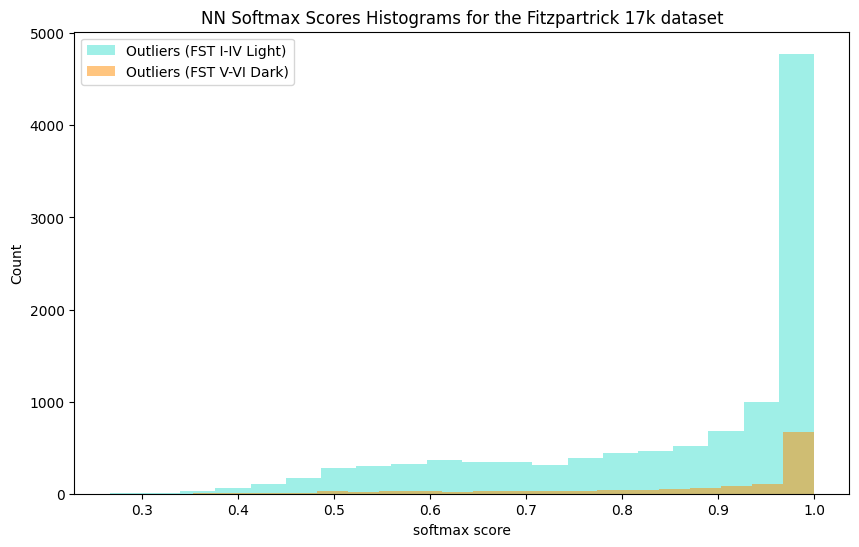

In [ ]:
import matplotlib.pyplot as plt





# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(abs(base_Lighter), bins=20, alpha=0.5, color="turquoise", label="Outliers (FST I-IV Light)")
plt.hist(abs(base_Darker), bins=20, alpha=0.5, color="darkorange", label="Outliers (FST V-VI Dark)")

# Add titles and labels
#plt.title("NN Softmax Scores Histograms for Different Categories")
plt.xlabel("softmax score")
plt.ylabel("Count")
plt.legend()
plt.title("NN Softmax Scores Histograms for the Fitzpartrick 17k dataset")
plt.show()

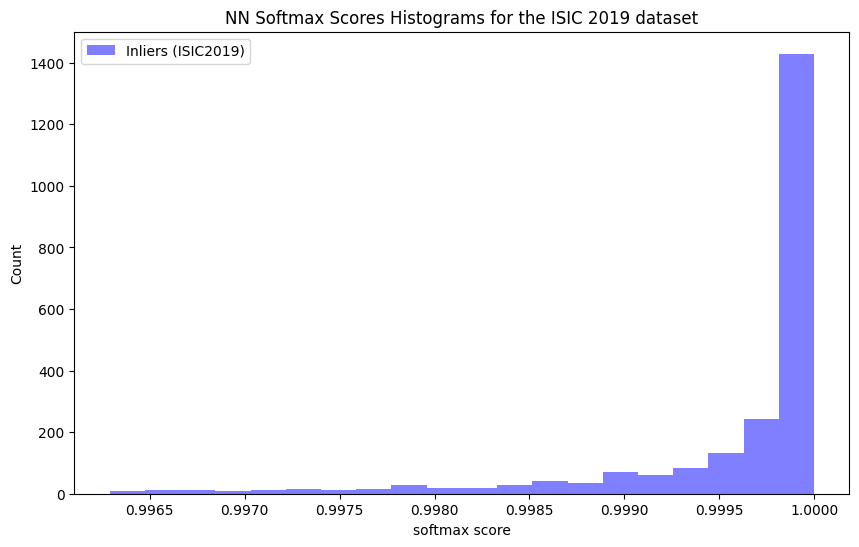

In [ ]:
import matplotlib.pyplot as plt





# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(abs(base_Inlier), bins=20, alpha=0.5, color="blue", label="Inliers (ISIC2019)")
#plt.hist(abs(base_Darker), bins=20, alpha=0.5, color="darkorange", label="Outliers (FST V-VI Dark)")

# Add titles and labels
#plt.title("NN Softmax Scores Histograms for Different Categories")
plt.xlabel("softmax score")
plt.ylabel("Count")
plt.legend()
plt.title("NN Softmax Scores Histograms for the ISIC 2019 dataset")
plt.show()

## ODIN

### Histograms

In [ ]:
import pandas as pd


in_dist_files_L = ['/content/densenet121_ODIN_200_0.0002_In_Lighter_Only.txt']
out_dist_files_L = ['/content/densenet121_ODIN_200_0.0002_Out_Lighter_Only.txt']
in_dist_files_D = ['/content/densenet121_ODIN_200_0.0002_In_Darker.txt']
out_dist_files_D = ['/content/densenet121_ODIN_200_0.0002_Out_Darker.txt']


in_dist_scores_L = pd.Series([float(score) for score in open(in_dist_files_L[0]).readlines()])
in_dist_scores_D = pd.Series([float(score) for score in open(in_dist_files_D[0]).readlines()])

out_dist_scores_L = pd.Series([float(score) for score in open(out_dist_files_L[0]).readlines()])
out_dist_scores_D = pd.Series([float(score) for score in open(out_dist_files_D[0]).readlines()])

# Create labels for each set of scores
in_dist_labels_L = pd.Series([0] * len(in_dist_scores_L))
in_dist_labels_D = pd.Series([1] * len(in_dist_scores_D))

out_dist_labels_L = pd.Series([2] * len(out_dist_scores_L))
out_dist_labels_D = pd.Series([3] * len(out_dist_scores_D))




# Concatenate scores and labels
in_dist_L_df = pd.concat([in_dist_scores_L, in_dist_labels_L], axis=1)
in_dist_L_df.columns = ['Scores', 'Labels']

in_dist_D_df = pd.concat([in_dist_scores_D, in_dist_labels_D], axis=1)
in_dist_D_df.columns = ['Scores', 'Labels']

out_dist_L_df = pd.concat([out_dist_scores_L, out_dist_labels_L], axis=1)
out_dist_L_df.columns = ['Scores', 'Labels']

out_dist_D_df = pd.concat([out_dist_scores_D, out_dist_labels_D], axis=1)
out_dist_D_df.columns = ['Scores', 'Labels']




df = pd.DataFrame({
    'Scores': pd.concat([in_dist_scores_L,in_dist_scores_D, out_dist_scores_L, out_dist_scores_D]),
    'Labels': pd.concat([in_dist_labels_L,in_dist_scores_D,out_dist_labels_L, out_dist_labels_D])
})

In [ ]:
out_dist_D_df["Labels"] = 3  # Assign label 2 to dark
out_dist_L_df["Labels"] = 2  # Assign label 1 to light
in_dist_L_df["Labels"] = 0  # Assign label 0 to train
in_dist_D_df["Labels"] = 1 # Assign label 0 to train

# Concatenate the DataFrames into one
df = pd.concat([in_dist_L_df,in_dist_D_df, out_dist_L_df, out_dist_D_df], ignore_index=True)
df= df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df

,Scores,Labels
0,0.176261,2
1,0.178890,2
2,0.175219,2
3,0.180510,2
4,0.176538,1
...,...,...
16544,0.177684,2
16545,0.174562,2
16546,0.198327,2
16547,0.177203,0


In [ ]:
# Define the optimal threshold
optimal_threshold =  0.1799#1799 #0.197895 #0.172632

# Create the "Output" column based on the condition
df['Output'] = (df['Scores'] < optimal_threshold).astype(int)

# Display the resulting DataFrame
df

,Scores,Labels,Output
0,0.176261,2,1
1,0.178890,2,1
2,0.175219,2,1
3,0.180510,2,0
4,0.176538,1,1
...,...,...,...
16544,0.177684,2,1
16545,0.174562,2,1
16546,0.198327,2,0
16547,0.177203,0,1


In [ ]:
#plotting and counting all the re
# Filter rows based on conditions
ODIN_Lighter = df[(df['Labels'] == 2) & (df['Output'] == 1) ]['Scores']
ODIN_Darker = df[(df['Labels'] == 3)& (df['Output'] == 1) ]['Scores']
ODIN_Inlier = df[(df['Labels'] == 0) &(df['Output'] == 0) ]['Scores']

# Print counts
print("Count of ODIN scores of lighter samples bellow threshold:", len(ODIN_Lighter))
print("Count of ODIN scores of darker samples bellow threshold:", len(ODIN_Darker))
print("Count of ODIN scores of inlier above threshold:", len(ODIN_Inlier))

Count of ODIN scores of lighter samples bellow threshold: 8580
Count of ODIN scores of darker samples bellow threshold: 957
Count of ODIN scores of inlier above threshold: 992


In [ ]:
#plotting and counting all the re
# Filter rows based on conditions
ODIN_Lighter = df[(df['Labels'] == 1) & (df['Output'] == 1) ]['Scores']
ODIN_Darker = df[(df['Labels'] == 2)& (df['Output'] == 1) ]['Scores']
ODIN_Inlier = df[(df['Labels'] == 0) &(df['Output'] == 0) ]['Scores']

# Print counts
print("Count of ODIN scores of lighter samples bellow threshold:", len(ODIN_Lighter))
print("Count of ODIN scores of darker samples bellow threshold:", len(ODIN_Darker))
print("Count of ODIN scores of inlier above threshold:", len(ODIN_Inlier))

Count of ODIN scores of lighter samples bellow threshold: 8580
Count of ODIN scores of darker samples bellow threshold: 957
Count of ODIN scores of inlier above threshold: 992


In [ ]:
ODIN_Lighter = df[(df['Labels'] == 2) & (df['Output'] == 0) ]['Scores']
ODIN_Darker = df[(df['Labels'] == 3)& (df['Output'] == 0) ]['Scores']
ODIN_Inlier = df[(df['Labels'] == 0) &(df['Output'] == 1) ]['Scores']

# Print counts
print("Count of ODIN scores of lighter samples above threshold:", len(ODIN_Lighter))
print("Count of ODIN scores of darker samples above threshold:", len(ODIN_Darker))
print("Count of ODIN scores of inlier bellow threshold:", len(ODIN_Inlier))

Count of ODIN scores of lighter samples above threshold: 1661
Count of ODIN scores of darker samples above threshold: 361
Count of ODIN scores of inlier bellow threshold: 1503


In [ ]:
ODIN_Lighter = df[(df['Labels'] == 2) & (df['Output'] == 0) ]['Scores']
ODIN_Darker = df[(df['Labels'] == 3)& (df['Output'] == 0) ]['Scores']
ODIN_Inlier = df[(df['Labels'] == 0) &(df['Output'] == 1) ]['Scores']

# Print counts
print("Count of ODIN scores of lighter samples above threshold:", len(ODIN_Lighter))
print("Count of ODIN scores of darker samples above threshold:", len(ODIN_Darker))
print("Count of ODIN scores of inlier bellow threshold:", len(ODIN_Inlier))

Count of ODIN scores of lighter samples above threshold: 1661
Count of ODIN scores of darker samples above threshold: 361
Count of ODIN scores of inlier bellow threshold: 1503


In [ ]:
#plotting and counting all the re
# Filter rows based on conditions
ODIN_Lighter = df[(df['Labels'] == 2)  ]['Scores']
ODIN_Darker = df[(df['Labels'] == 3) ]['Scores']
ODIN_Inlier = df[(df['Labels'] == 0) ]['Scores']

# Print counts
print("Count of ODIN scores of lighter samples :", len(ODIN_Lighter))
print("Count of ODIN scores of darker samples:", len(ODIN_Darker))
print("Count of ODIN scores of inlier :", len(ODIN_Inlier))

Count of ODIN scores of lighter samples : 10241
Count of ODIN scores of darker samples: 1318
Count of ODIN scores of inlier : 2495


In [ ]:
#plotting and counting all the re
# Filter rows based on conditions
ODIN_Lighter = df[(df['Labels'] == 2)  ]['Scores']
ODIN_Darker = df[(df['Labels'] == 3) ]['Scores']
ODIN_Inlier = df[(df['Labels'] == 0) ]['Scores']

# Print counts
print("Count of ODIN scores of lighter samples :", len(ODIN_Lighter))
print("Count of ODIN scores of darker samples:", len(ODIN_Darker))
print("Count of ODIN scores of inlier :", len(ODIN_Inlier))

Count of ODIN scores of lighter samples : 10241
Count of ODIN scores of darker samples: 1318
Count of ODIN scores of inlier : 2495


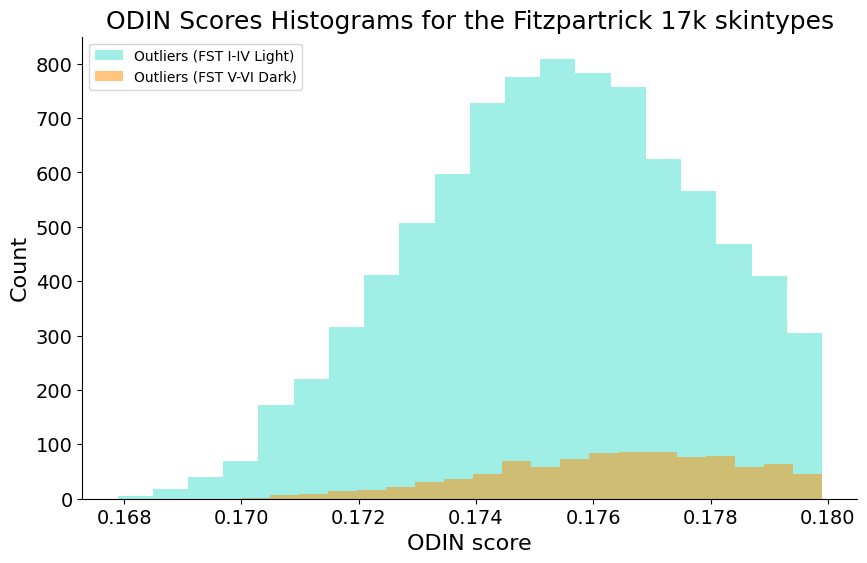

In [ ]:
import matplotlib.pyplot as plt





# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(abs(ODIN_Lighter), bins=20, alpha=0.5, color="turquoise", label="Outliers (FST I-IV Light)")
plt.hist(abs(ODIN_Darker), bins=20, alpha=0.5, color="darkorange", label="Outliers (FST V-VI Dark)")

# Add titles and labels
#plt.title("NN Softmax Scores Histograms for Different Categories")
plt.xlabel("ODIN score",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.legend()
plt.title("ODIN Scores Histograms for the Fitzpartrick 17k skintypes",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.gca()  # Get the current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

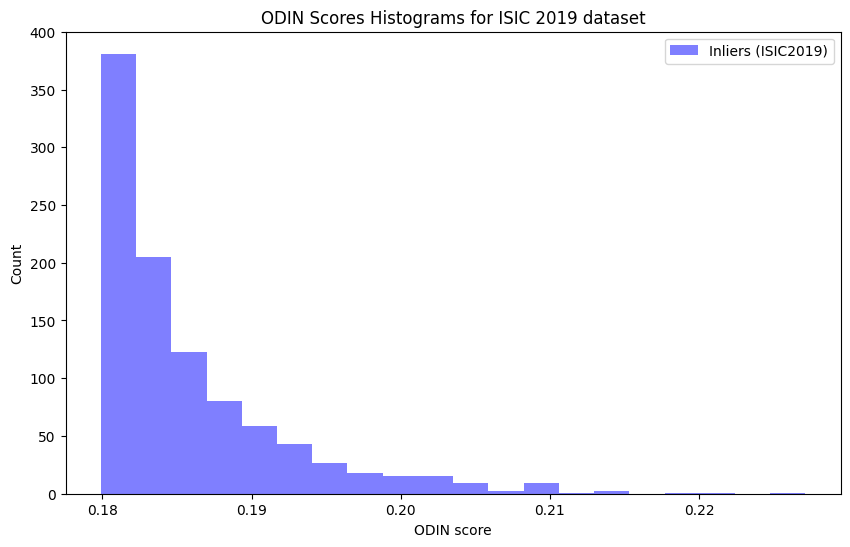

In [ ]:
import matplotlib.pyplot as plt





# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(abs(ODIN_Inlier), bins=20, alpha=0.5, color="blue", label="Inliers (ISIC2019)")
#plt.hist(abs(base_Darker), bins=20, alpha=0.5, color="darkorange", label="Outliers (FST V-VI Dark)")

# Add titles and labels
#plt.title("NN Softmax Scores Histograms for Different Categories")
plt.xlabel("ODIN score")
plt.ylabel("Count")
plt.legend()
plt.title("ODIN Scores Histograms for ISIC 2019 dataset")
plt.show()